# Multi-dimensional data access with Xarray

![](http://xarray.pydata.org/en/stable/_images/dataset-diagram.png)

Henrik Andersson, 2022-05-19

In [55]:
import xarray
xarray.set_options(display_expand_data=False, display_expand_attrs=False)

In [56]:
ds = xarray.open_dataset("data/gefs.nc")
ds

<xarray.Dataset>
Dimensions:   (ens: 10, time: 65, lat: 15, lon: 31)
Coordinates:
  * ens       (ens) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time      (time) datetime64[ns] 2022-05-16 ... 2022-06-01
  * lat       (lat) float64 53.0 53.5 54.0 54.5 55.0 ... 58.5 59.0 59.5 60.0
  * lon       (lon) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 13.0 13.5 14.0 14.5 15.0
Data variables:
    prmslmsl  (ens, time, lat, lon) float32 ...
    tmp2m     (ens, time, lat, lon) float32 ...
    rh2m      (ens, time, lat, lon) float32 ...
Attributes: (4)

In [57]:
prmsl = ds.prmslmsl
prmsl

<xarray.DataArray 'prmslmsl' (ens: 10, time: 65, lat: 15, lon: 31)>
[302250 values with dtype=float32]
Coordinates:
  * ens      (ens) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time     (time) datetime64[ns] 2022-05-16 2022-05-16T06:00:00 ... 2022-06-01
  * lat      (lat) float64 53.0 53.5 54.0 54.5 55.0 ... 58.0 58.5 59.0 59.5 60.0
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 13.0 13.5 14.0 14.5 15.0
Attributes: (1)

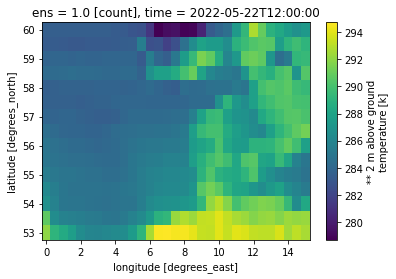

In [58]:
ds.tmp2m.sel(time="2022-05-22 12:00").sel(ens=1).plot()

In [59]:
example = ds.tmp2m.sel(time="2022-05-22 12:00").sel(ens=1)

In [60]:
anomaly = (example - example.mean())

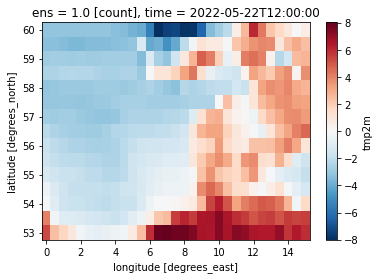

In [61]:
anomaly.plot()

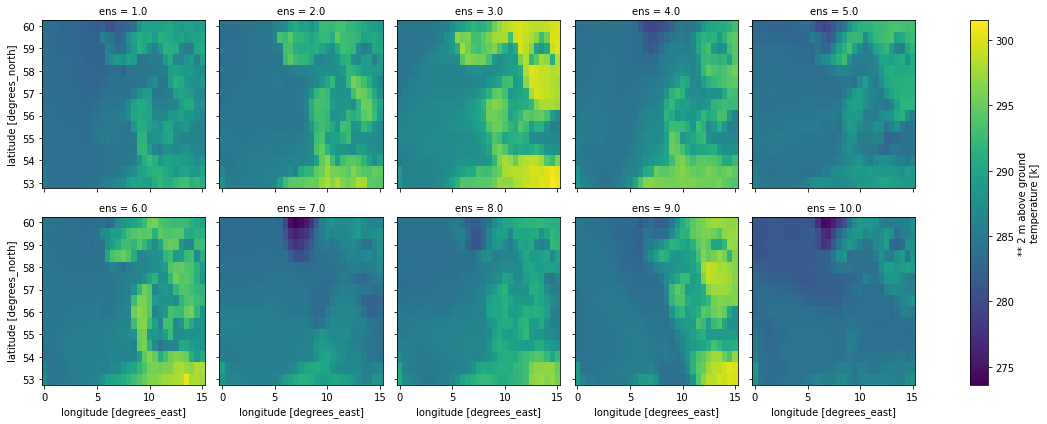

In [62]:
ds.tmp2m.sel(time="2022-05-31 12:00").plot(x="lon", y="lat", col="ens", col_wrap=5)

In [63]:
prmsl_cph = prmsl.interp(lat=55.67,lon=12.56) /100;

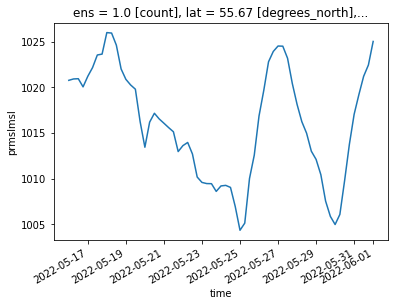

In [64]:
prmsl_cph.sel(ens=1).plot()

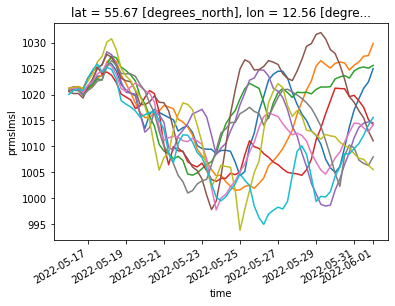

In [65]:
prmsl_cph.plot.line(x='time', add_legend=False);

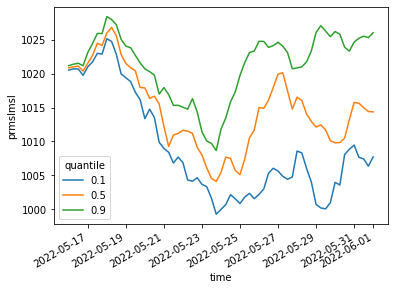

In [66]:
prmsl_cph.quantile(q=[0.1,0.5,0.9], dim="ens").plot.line(x="time");

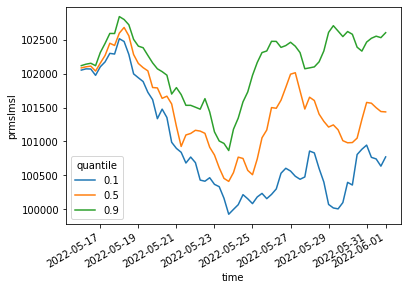

In [67]:
(ds.prmslmsl
   .interp(lat=55.67,lon=12.56) # Copenhagen
   .quantile(q=[0.1,0.5,0.9], dim="ens")
   .plot.line(x="time"));

In [68]:
prmsl_cph.min(dim="ens").to_dataframe()

,lat,lon,prmslmsl
time,,,
2022-05-16 00:00:00,55.67,12.56,1020.033215
2022-05-16 06:00:00,55.67,12.56,1020.200098
2022-05-16 12:00:00,55.67,12.56,1020.229624
2022-05-16 18:00:00,55.67,12.56,1019.335833
2022-05-17 00:00:00,55.67,12.56,1020.755619
...,...,...,...
2022-05-31 00:00:00,55.67,12.56,1008.560618
2022-05-31 06:00:00,55.67,12.56,1007.356094
2022-05-31 12:00:00,55.67,12.56,1006.698854


In [69]:
prmsl.mean(dim="time")

<xarray.DataArray 'prmslmsl' (ens: 10, lat: 15, lon: 31)>
1.019e+05 1.019e+05 1.019e+05 1.019e+05 ... 1.006e+05 1.007e+05 1.007e+05
Coordinates:
  * ens      (ens) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * lat      (lat) float64 53.0 53.5 54.0 54.5 55.0 ... 58.0 58.5 59.0 59.5 60.0
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 13.0 13.5 14.0 14.5 15.0

In [70]:
filename = "time_averaged_ensemble_mslp.nc"
prmsl.mean(dim="time").to_netcdf(filename)

In [71]:
xarray.open_dataset(filename)

<xarray.Dataset>
Dimensions:   (ens: 10, lat: 15, lon: 31)
Coordinates:
  * ens       (ens) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * lat       (lat) float64 53.0 53.5 54.0 54.5 55.0 ... 58.5 59.0 59.5 60.0
  * lon       (lon) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 13.0 13.5 14.0 14.5 15.0
Data variables:
    prmslmsl  (ens, lat, lon) float32 ...